# The Final Model

Now that I have my features engineered and extraneous information removed, I can prepare grid searches to tune for the best model to predict my target variable. I will be using Linear Regression, Lasso/Ridge/Elastic Net, Random Forest, and Gradient Boost to see which of these will work best. I have concerns about the ensemble methods being effective since I have such a small dataset, so I will be looking for which models are not overfitting as much. 

As a disclaimer, I did some iterative testing of various engineered features that I've since lost in my notebooks, so if it seems like a particular feature is missing at this point, it is likely that the feature was removed during that testing.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import datetime, time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
with open('../0_Assets_&_Data/final_model.pickle', 'rb') as handle:
    good_model = pickle.load(handle)

with open('../0_Assets_&_Data/model_prelim.pickle', 'rb') as handle:
    model_df = pickle.load(handle)

I now have a better idea of how I'd like to approach the features. The categories aren't necessarily always helping, so I wlil leave certain values (i.e. month, day of week, etc.) as dummied text while still manipulating weights given to certain other categorical data.

In [3]:
good_model.columns

Index(['number_of_episodes_x', 'number_of_seasons_x', 'awards_x',
       'imdb_rating_x', 'imdb_votes_x', 'timeslot_00:00', 'timeslot_afternoon',
       'timeslot_evening', 'timeslot_latenight', 'timeslot_morning',
       'timeslot_unknown', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Western', 'status_Canceled',
       'status_Ended', 'status_In Production', 'status_Returning Series',
       'type_Documentary', 'type_Miniseries', 'type_News', 'type_Reality',
       'type_Scripted', 'type_Talk Show', 'type_Video', 'runtime_full',
       'runtime_half', 'runtime_spe

In [4]:
good_model.drop(['number_of_episodes_y', 'number_of_seasons_y', 
                 'awards_y', 'imdb_votes_y', 'imdb_rating_y'], axis=1, inplace=True)

I'm only leaving in the below line for my own future evaluatino because it was providing me with a higher score (with less overfitting) for gradient boost only - however, I believe that the additional information from the engineered features are better for the final model.

In [5]:
X = good_model[['imdb_votes_x', 'awards_x', 'number_of_seasons_x', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Western', 'actor_1_weighted', 'actor_2_weighted', 'actor_3_weighted',
       'actor_4_weighted', 'number_of_episodes_x']]
y = good_model['imdb_rating_x']

In [6]:
X = good_model.drop(['actor_1',
                     'actor_2', 
                     'actor_3', 
                     'actor_4', 
                     'actors_cum_sum',
                     'imdb_rating_x'], axis=1)
y = good_model['imdb_rating_x']

In [7]:
X.columns

Index(['number_of_episodes_x', 'number_of_seasons_x', 'awards_x',
       'imdb_votes_x', 'timeslot_00:00', 'timeslot_afternoon',
       'timeslot_evening', 'timeslot_latenight', 'timeslot_morning',
       'timeslot_unknown', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Western', 'status_Canceled',
       'status_Ended', 'status_In Production', 'status_Returning Series',
       'type_Documentary', 'type_Miniseries', 'type_News', 'type_Reality',
       'type_Scripted', 'type_Talk Show', 'type_Video', 'runtime_full',
       'runtime_half', 'runtime_special', 'actor_1_w

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.1)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

# Setting up Grid Search(es)

Now that I have an idea of which features do and don't work, I can focus on the hyperparameters as well to achieve a better score. I will be evaluating based on R2 and MAE. 


## $R^2$

In [9]:
lr_gs = GridSearchCV(LinearRegression(), 
                         {'n_jobs': [1, 5, 10]}, 
                         n_jobs=10)

In [10]:
lr_gs.fit(X_train_sc, y_train)

lr_gs.score(X_train_sc, y_train), lr_gs.score(X_test_sc, y_test)

(0.3100586223618895, 0.20002541467324245)

Linear Regression is a relatively simple model, so there is not much tuning I can do with this. The score is a bit better than the initial model, but still not very good at just 24% variance being explained by my model.

In [11]:
lasso_gs = GridSearchCV(LassoCV(),
                        {'n_alphas': [100, 250],
                        'tol': [.0001, .001, .01]}
)

In [12]:
lasso_gs.fit(X_train_sc, y_train)
lasso_gs.score(X_train_sc, y_train), lasso_gs.score(X_test_sc, y_test)

(0.29449253464182545, 0.23399012864458202)

The Lasso model performs pretty well in terms of not overfitting as much, and scoring higher than the regular linear regression. This makes sense, as the model may have too many features that this model can zero out. Although better, 27% is still not a very reliable model. 

In [13]:
ridge_gs = GridSearchCV(RidgeCV(),
                        {'alphas': [(0.1, 1.0, 10.0), (0.01, 1.0, 10.0)]}
)

In [14]:
ridge_gs.fit(X_train_sc, y_train)
ridge_gs.score(X_train_sc, y_train), ridge_gs.score(X_test_sc, y_test)

(0.3101442922175983, 0.20236491142829827)

Ridge regression is performing worse than Lasso, which again makes sense given that Ridge still tries to see all features.

In [15]:
en_gs = GridSearchCV(ElasticNetCV(),
                        {'l1_ratio': [0.25, 0.5, 0.75],
                         'n_alphas': [100, 250],
                         'tol': [0.0001, 0.001, 0.01]}
)

In [16]:
en_gs.fit(X_train_sc, y_train)
en_gs.score(X_train_sc, y_train), en_gs.score(X_test_sc, y_test)

(0.2914899033998638, 0.2376528888311612)

In [17]:
en_gs.best_params_

{'l1_ratio': 0.25, 'n_alphas': 250, 'tol': 0.01}

This model performs similar to lasso (slightly worse in this seeded random state), which makes sense given that it is utilizing lasso as part of the ratio in the parameter. 

In [18]:
rf_gs = GridSearchCV(RandomForestRegressor(), 
                         {'n_estimators': [10, 100, 200],
                         'max_depth': [5, 25, 50],
                         'min_samples_split': [2, 5, 10],
                         'n_jobs': [1, 5, 10]}
)

In [19]:
rf_gs.fit(X_train_sc, y_train)
rf_gs.score(X_train_sc, y_train), rf_gs.score(X_test_sc, y_test)

(0.922029828186609, 0.42930929494073755)

In [20]:
rf_gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=5,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
rf_gs.best_params_

{'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': 5}

Random forest is surprisingly overfit. Looking at the 

In [22]:
gb_gs = GridSearchCV(GradientBoostingRegressor(),
                        {'learning_rate': [0.01, 0.1, 0.15],
                        'n_estimators': [100, 150],
                        'min_samples_split': [2, 4, 6],
                        'max_depth': [3, 5, 10],
                        'max_features': [0.5, 0.75, None],
                        'alpha': [0.9, 0.95]}
)

In [23]:
gb_gs.fit(X_train_sc, y_train)
gb_gs.score(X_train_sc, y_train), gb_gs.score(X_test_sc, y_test)

(0.7747844141500337, 0.4007269030453479)

In [24]:
gb_gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=0.5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [25]:
gb_gs.best_params_

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 0.5,
 'min_samples_split': 6,
 'n_estimators': 100}

The gradient boost model is also overfitting, but the train and test scores are very good relative to the other models.  

As a sidenote, I was actually seeing better results on most of the models by removing certain features (namely the months and timeslots), but removing these did not affect the overfitting that was happening, and the only model being reduced was Gradient Boost. Because the difference in score was relatively marginal (and therefore may be attributable to the particular split/seed), I decided to leave the features in. 

## MAE

In addition to using the $R^2$ function as the scoring metric, I also want to take a look at the Mean Absolute Error (MAE), which can show me how far from the actual values my prediction is actually giving. The purpose of using MAE in this instance would be to see how far off my predictions are in terms of scaled numbers, rather than using $R^2$ to give a percentage of how much the variance is explained by the regression line. 

In [26]:
np.std(model_df['imdb_rating'])

1.1195643334570298

For reference, one standard deviation for the IMDB ratings distribution is 1.12.

In [27]:
lr_gs = GridSearchCV(LinearRegression(), 
                         {'n_jobs': [1, 5, 10]}, 
                         scoring='neg_mean_absolute_error',
                         n_jobs=10)

In [28]:
lr_gs.fit(X_train_sc, y_train)

lr_gs.score(X_train_sc, y_train), lr_gs.score(X_test_sc, y_test)

(-0.7025911982887291, -0.7152167739010926)

In [29]:
lasso_gs = GridSearchCV(LassoCV(),
                        {'n_alphas': [100, 250],
                        'tol': [.0001, .001, .01]},
                        scoring='neg_mean_absolute_error'
)

In [30]:
lasso_gs.fit(X_train_sc, y_train)
lasso_gs.score(X_train_sc, y_train), lasso_gs.score(X_test_sc, y_test)

(-0.7102187796022962, -0.6970559454264671)

In [31]:
ridge_gs = GridSearchCV(RidgeCV(),
                        {'alphas': [(0.1, 1.0, 10.0), (0.01, 1.0, 10.0)]},
                        scoring='neg_mean_absolute_error'
)

In [32]:
ridge_gs.fit(X_train_sc, y_train)
ridge_gs.score(X_train_sc, y_train), ridge_gs.score(X_test_sc, y_test)

(-0.7024751712764404, -0.7144068218103254)

In [33]:
en_gs = GridSearchCV(ElasticNetCV(),
                        {'l1_ratio': [0.25, 0.5, 0.75],
                         'n_alphas': [100, 250],
                         'tol': [0.0001, 0.001, 0.01]},
                     scoring='neg_mean_absolute_error'
)

In [34]:
en_gs.fit(X_train_sc, y_train)
en_gs.score(X_train_sc, y_train), en_gs.score(X_test_sc, y_test)

(-0.7120924558229711, -0.6949002296712098)

In [35]:
rf_gs = GridSearchCV(RandomForestRegressor(), 
                         {'n_estimators': [10, 100, 200],
                         'max_depth': [5, 25, 50],
                         'min_samples_split': [2, 5, 10],
                         'n_jobs': [1, 5, 10]},
                     scoring='neg_mean_absolute_error'
)

In [36]:
rf_gs.fit(X_train_sc, y_train)
rf_gs.score(X_train_sc, y_train), rf_gs.score(X_test_sc, y_test)

(-0.3396263238183098, -0.5826087589687412)

In [37]:
gb_gs = GridSearchCV(GradientBoostingRegressor(),
                        {'learning_rate': [0.01, 0.1],
                        'n_estimators': [100, 250],
                        'min_samples_split': [2, 4, 6],
                        'max_depth': [3, 5, 10],
                        'alpha': [0.9, 0.95]},
                     scoring='neg_mean_absolute_error'
)

In [38]:
gb_gs.fit(X_train_sc, y_train)
gb_gs.score(X_train_sc, y_train), gb_gs.score(X_test_sc, y_test)

(-0.38871379617135404, -0.5992216669010125)

In [39]:
np.mean(model_df['imdb_rating'])
# mean of the target

7.048544203282162

In [40]:
np.std(model_df['imdb_rating'])
# standard deviation of the target

1.1195643334570298

# Evaluation

The models are all overfitting quite some bit, but gradient boost and random forest appear to be performing the best with close to 40% explained variance. Both models, however, are grossly overfit, so I would not take either model as they are to production. Linear regression (and ridge and lasso) scored a bit more consistently, but also had lower scores. 

The outcome is not very surprising, especially given the high amount of features (relatively speaking) versus the low number of observations. Although Boosting is generally less likely to ovefit due to the ensemble approach the model has in "averaging" the trees, this is not seen as the case in this dataset. This makes it better for weak learning datasets (i.e. high bias and low variance, as my dataset ought to have). On the other hand, Random Forest will be better suited towards low bias, high variance models. 

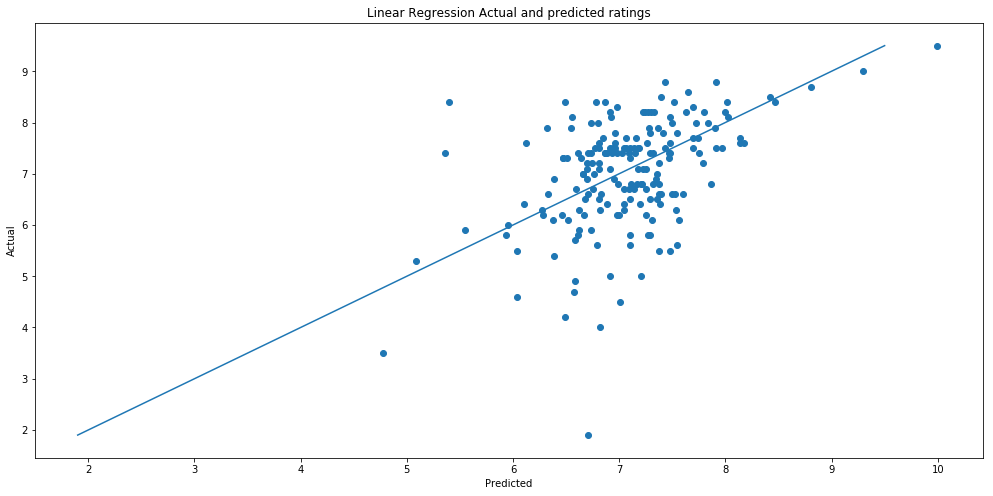

In [41]:
y_pred = lr_gs.predict(X_test_sc)

plt.figure(figsize=(17,8))
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],'-');
plt.scatter(y_pred, y_test);
plt.title("Linear Regression Actual and predicted ratings");
plt.xlabel("Predicted");
plt.ylabel("Actual");
plt.show();

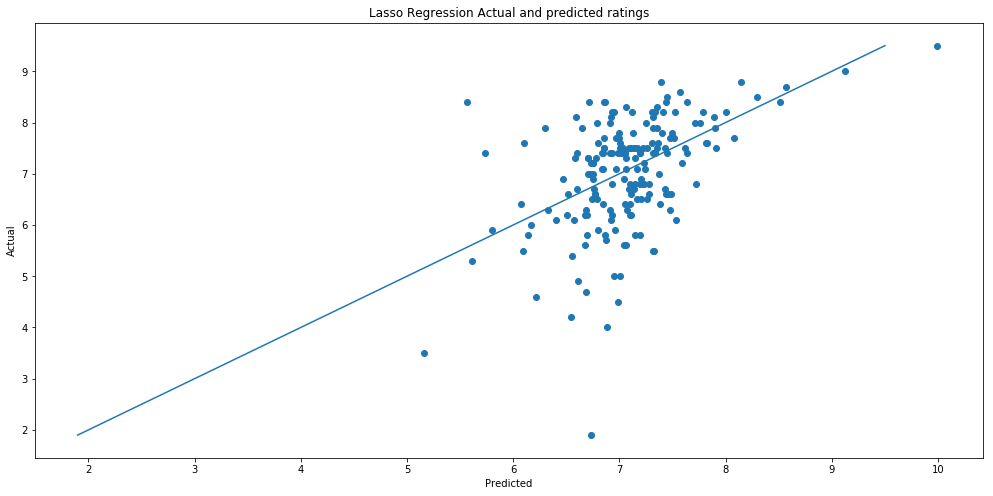

In [42]:
y_pred = lasso_gs.predict(X_test_sc)

plt.figure(figsize=(17,8))
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],'-');
plt.scatter(y_pred, y_test);
plt.title("Lasso Regression Actual and predicted ratings");
plt.xlabel("Predicted");
plt.ylabel("Actual");
plt.show();

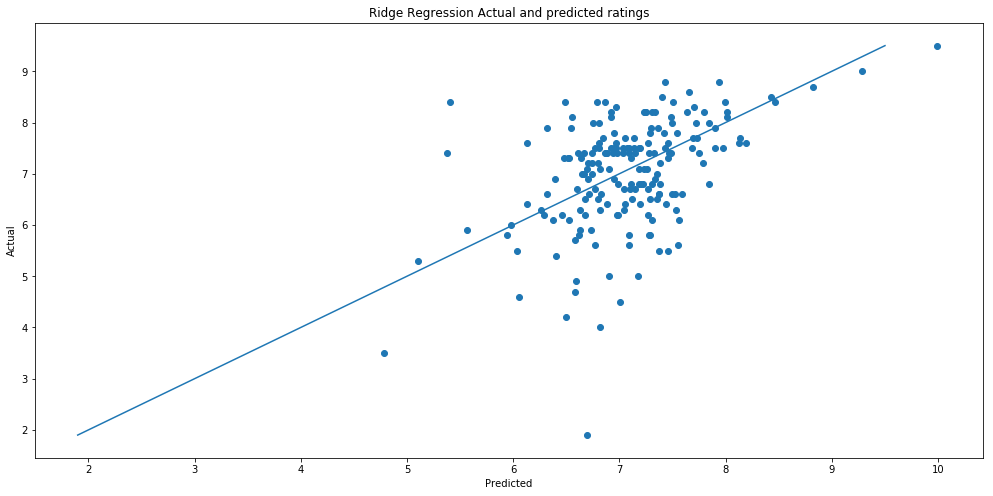

In [43]:
y_pred = ridge_gs.predict(X_test_sc)

plt.figure(figsize=(17,8))
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],'-');
plt.scatter(y_pred, y_test);
plt.title("Ridge Regression Actual and predicted ratings");
plt.xlabel("Predicted");
plt.ylabel("Actual");
plt.show();

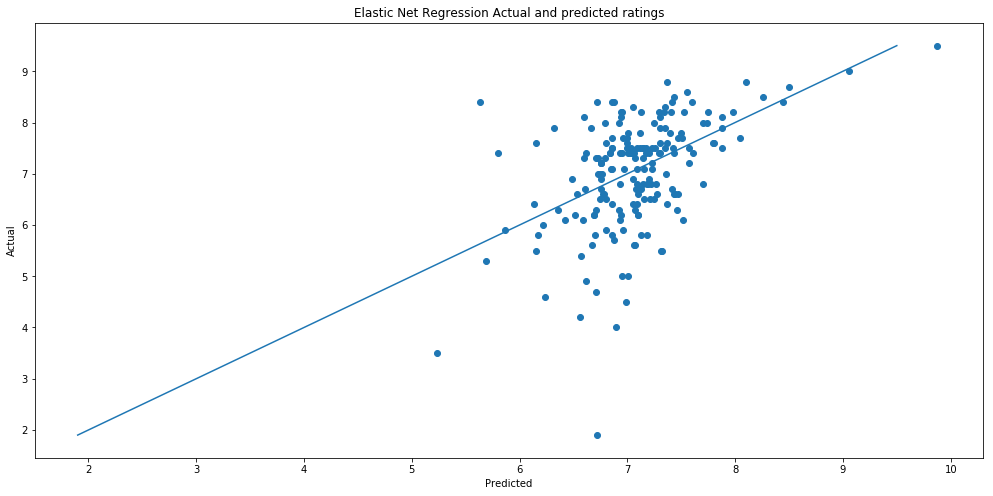

In [44]:
y_pred = en_gs.predict(X_test_sc)

plt.figure(figsize=(17,8))
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],'-');
plt.scatter(y_pred, y_test);
plt.title("Elastic Net Regression Actual and predicted ratings");
plt.xlabel("Predicted");
plt.ylabel("Actual");
plt.show();

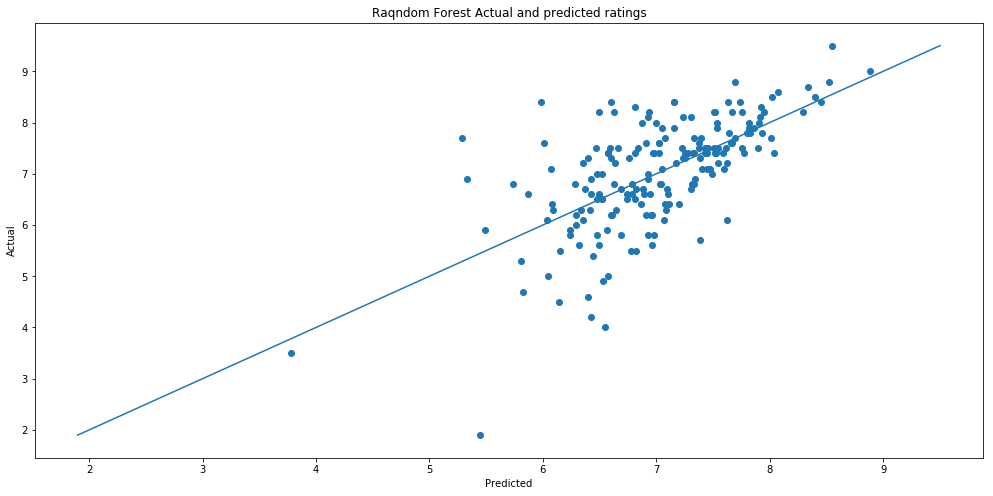

In [45]:
y_pred = rf_gs.predict(X_test_sc)

plt.figure(figsize=(17,8))
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],'-');
plt.scatter(y_pred, y_test);
plt.title("Raqndom Forest Actual and predicted ratings");
plt.xlabel("Predicted");
plt.ylabel("Actual");
plt.show();

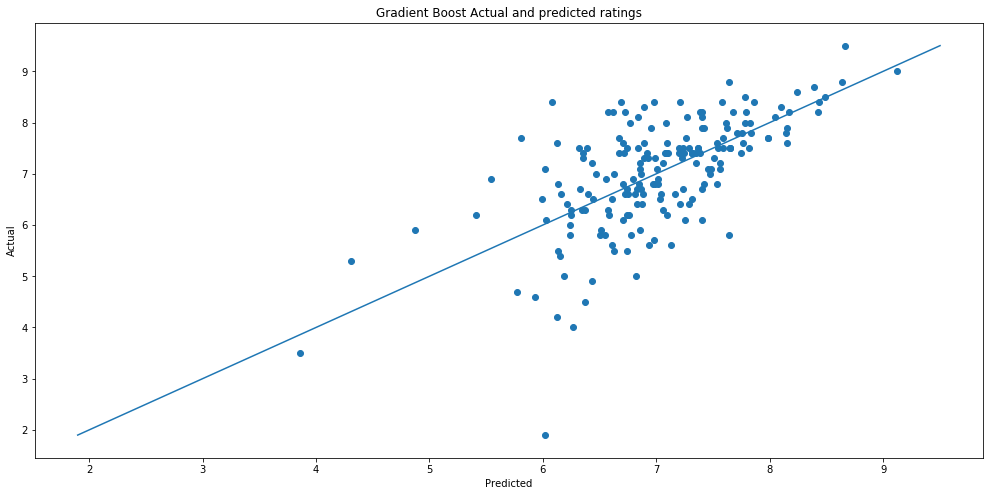

In [46]:
y_pred = gb_gs.predict(X_test_sc)

plt.figure(figsize=(17,8))
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],'-');
plt.scatter(y_pred, y_test);
plt.title("Gradient Boost Actual and predicted ratings");
plt.xlabel("Predicted");
plt.ylabel("Actual");
plt.show();